In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


649

In [9]:
df = pd.DataFrame({"City":cities})
df["Latitude"]=""
df["Longitude"]=""
df["Temperature (F)"]=""
df["Humidity (%)"]=""
df["Cloudiness (%)"]=""
df["Wind Speed (mph)"]=""
df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,cidreira,,,,,,
1,rikitea,,,,,,
2,kabo,,,,,,
3,maarianhamina,,,,,,
4,roebourne,,,,,,


In [17]:
url = (f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q=")

for index, row in df.iterrows():

    city_name = row["City"]

    print(f"Obtaining weather results for {city_name}.")
    
    response = requests.get(url+city_name).json()
    
    try:        
        df.loc[index, "Latitude"] = response["coord"]["lat"]
        df.loc[index, "Longitude"] = response["coord"]["lon"]
        df.loc[index, "Temperature (F)"] = response["main"]["temp"]
        df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]

        
    except (KeyError, IndexError):
        print(f"Error finding data for {city_name}.")


Obtaining weather results for cidreira.
Obtaining weather results for rikitea.
Obtaining weather results for kabo.
Obtaining weather results for maarianhamina.
Error finding data for maarianhamina.
Obtaining weather results for roebourne.
Obtaining weather results for saint george.
Obtaining weather results for puerto ayora.
Obtaining weather results for bredasdorp.
Obtaining weather results for ushuaia.
Obtaining weather results for sao filipe.
Obtaining weather results for biltine.
Obtaining weather results for torbay.
Obtaining weather results for siavonga.
Obtaining weather results for strezhevoy.
Obtaining weather results for qasigiannguit.
Obtaining weather results for new norfolk.
Obtaining weather results for punta arenas.
Obtaining weather results for belushya guba.
Error finding data for belushya guba.
Obtaining weather results for cornelius.
Obtaining weather results for tasiilaq.
Obtaining weather results for tiksi.
Obtaining weather results for aklavik.
Obtaining weather r

Obtaining weather results for jiddah.
Error finding data for jiddah.
Obtaining weather results for kaduqli.
Obtaining weather results for mehamn.
Obtaining weather results for kadyy.
Obtaining weather results for karratha.
Obtaining weather results for suriapet.
Obtaining weather results for chabahar.
Obtaining weather results for pingliang.
Obtaining weather results for husavik.
Obtaining weather results for jennings.
Obtaining weather results for cayenne.
Obtaining weather results for hereford.
Obtaining weather results for saskylakh.
Obtaining weather results for sangar.
Obtaining weather results for san patricio.
Obtaining weather results for sinegorye.
Obtaining weather results for benicarlo.
Obtaining weather results for kozhva.
Obtaining weather results for tazovskiy.
Obtaining weather results for bambous virieux.
Obtaining weather results for pingdingshan.
Obtaining weather results for kapaa.
Obtaining weather results for skibbereen.
Obtaining weather results for slave lake.
Ob

Obtaining weather results for petropavlovsk-kamchatskiy.
Obtaining weather results for los llanos de aridane.
Obtaining weather results for tulun.
Obtaining weather results for wahran.
Error finding data for wahran.
Obtaining weather results for karauzyak.
Error finding data for karauzyak.
Obtaining weather results for huambo.
Obtaining weather results for calbuco.
Obtaining weather results for sharanga.
Obtaining weather results for olavarria.
Obtaining weather results for lorengau.
Obtaining weather results for ganzhou.
Obtaining weather results for kamphaeng phet.
Obtaining weather results for sorong.
Obtaining weather results for sokolka.
Obtaining weather results for krasnoselkup.
Error finding data for krasnoselkup.
Obtaining weather results for labutta.
Error finding data for labutta.
Obtaining weather results for atasu.
Obtaining weather results for pisco.
Obtaining weather results for namibe.
Obtaining weather results for kungurtug.
Obtaining weather results for krasnoborsk.
O

Obtaining weather results for college.
Obtaining weather results for geghamasar.
Obtaining weather results for anadyr.
Obtaining weather results for ulagan.
Obtaining weather results for lusambo.
Obtaining weather results for gritsovskiy.
Obtaining weather results for fonte boa.
Obtaining weather results for katsiveli.
Error finding data for katsiveli.
Obtaining weather results for koumac.
Obtaining weather results for kenai.
Obtaining weather results for shagonar.
Obtaining weather results for allapalli.
Obtaining weather results for north battleford.
Obtaining weather results for goulburn.
Obtaining weather results for terrace bay.
Obtaining weather results for birao.
Obtaining weather results for half moon bay.
Obtaining weather results for buchanan.
Obtaining weather results for tahlequah.
Obtaining weather results for andevoranto.
Error finding data for andevoranto.
Obtaining weather results for mackay.
Obtaining weather results for minab.
Obtaining weather results for verkhnevily

In [42]:
new_df["Latitude"].replace('', np.nan, inplace=True)
new_df["Longitude"].replace('', np.nan, inplace=True)
new_df["Temperature (F)"].replace('', np.nan, inplace=True)
new_df["Humidity (%)"].replace('', np.nan, inplace=True)
new_df["Cloudiness (%)"].replace('', np.nan, inplace=True)
new_df["Wind Speed (mph)"].replace('', np.nan, inplace=True)

weather_data = new_df.dropna(how="any")
weather_data.count()

City                583
Latitude            583
Longitude           583
Temperature (F)     583
Humidity (%)        583
Cloudiness (%)      583
Wind Speed (mph)    583
dtype: int64

In [63]:
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,cidreira,-30.17,-50.22,54.77,78.0,0.0,3.69
1,rikitea,-23.12,-134.97,73.31,79.0,95.0,25.28
2,kabo,7.69,18.62,70.61,92.0,0.0,3.85
4,roebourne,-20.77,117.15,71.69,69.0,98.0,15.97
5,saint george,39.45,22.34,70.65,88.0,20.0,0.58


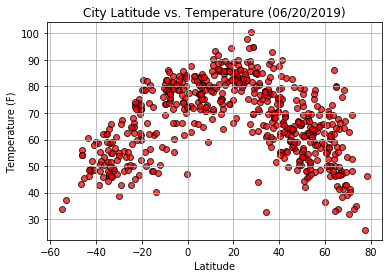

In [57]:
x_axis = weather_data["Latitude"]
temp_y = weather_data["Temperature (F)"]
plt.scatter(x_axis, temp_y, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Temperature (06/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Output/city_lat_vs_temp.png")
plt.show()

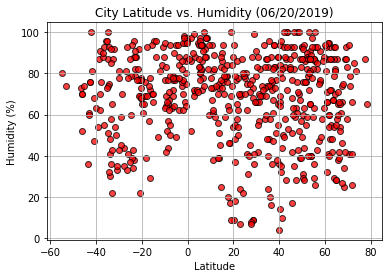

In [58]:
humid_y = weather_data["Humidity (%)"]
plt.scatter(x_axis, humid_y, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity (06/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/city_lat_vs_humidity.png")
plt.show()

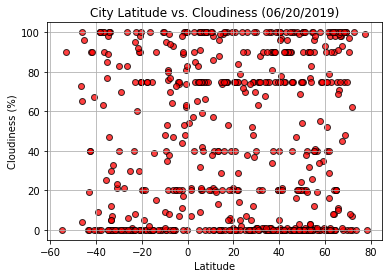

In [59]:
cloud_y = weather_data["Cloudiness (%)"]
plt.scatter(x_axis, cloud_y, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness (06/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/city_lat_vs_cloudiness.png")
plt.show()

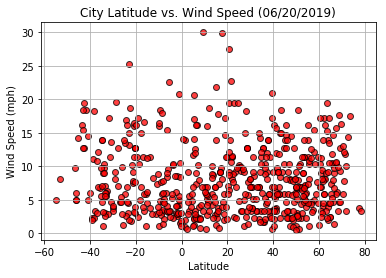

In [60]:
wind_y = weather_data["Wind Speed (mph)"]
plt.scatter(x_axis, wind_y, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed (06/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output/city_lat_vs_wind_speed.png")
plt.show()

In [ ]:
# Three observable trends from this data are:
#     1. There is definitely a strong correlation between latitude and temperature.  You can safely assume
#     that the closer you are to the equator, the hotter the temperature will be.
#     2. When it comes to humidity, if you are looking for places that have extremely low humidity, you need
#     to go to the northern hemisphere.  The only locations with humidity lower than 20% were in the northern 
#     hemisphere.  The southern hemisphere has humidity that ranges from moderate to high.
#     3. There is no real correlation between wind speed and latitude. There is a very slight chance of increased
#     wind speed when close to the equator, but the places with this data are closer to outliers than primary plots.
    